In [14]:
import serial
import pymysql
from time import localtime, strftime

In [24]:
lastTime = 0
T = serial.Serial('/dev/ttyACM0', 9600)
strCo = ''
strTotal = ''
while True:
    strTotal = T.readline()
    strTotal = strTotal.decode('utf-8')
    strTotal = strTotal.replace("b", "")
    strTotal = strTotal.replace("'", "")
    strTotal = strTotal.replace("\n", "")
    strHumi = strTotal[10:16]
    strTemp = strTotal[4:10]
    strCo = strTotal[0:4]
    print(strTotal[0:4], strTotal[4:10], strTotal[10:16])
  
    db = pymysql.connect(host='localhost', user='guest_test', passwd = 'test1234!', db='ml_db')

    with db:
        cur = db.cursor()

        cur.execute('INSERT INTO co_eyes_temp(temperature, humidity, co2) VALUES (%s, %s, %s)', (strTemp, strHumi, strCo))
        db.commit()

400  26.60  41.00 
400  26.60  41.00 
400  26.60  41.00 
400  26.60  41.00 
400  26.60  41.00 
886  26.60  41.00 
1872  26.60  41.00
2641  26.60  41.00
3060  26.60  41.00
3400  26.60  41.00
3215  26.60  41.00


KeyboardInterrupt: 

In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
db= pymysql.connect( # db 연결
    user='guest_test',
    passwd='test1234!',
    host='121.143.172.28',
    db='ml_db')

cursor = db.cursor()
sql = "INSERT INTO co_eyes_predictlabel (label, total_sleep_count) VALUES (%s, %s)"
query = "SELECT * FROM co_eyes_predictlabel"
cursor.execute(query)
db.commit()

In [3]:
datas = cursor.fetchall()

In [4]:
datas

((1, 'closed', 1, datetime.datetime(2022, 5, 9, 2, 12, 45)),
 (2, 'closed', 1, datetime.datetime(2022, 5, 9, 2, 13, 24)),
 (3, 'closed', 1, datetime.datetime(2022, 5, 9, 2, 13, 56)),
 (4, 'closed', 1, datetime.datetime(2022, 5, 9, 2, 17, 46)),
 (5, 'closed', 1, datetime.datetime(2022, 5, 9, 2, 20, 18)),
 (6, 'closed', 1, datetime.datetime(2022, 5, 9, 2, 26, 44)),
 (7, 'closed', 2, datetime.datetime(2022, 5, 9, 2, 26, 51)),
 (8, 'closed', 3, datetime.datetime(2022, 5, 9, 2, 26, 57)),
 (9, 'closed', 1, datetime.datetime(2022, 5, 10, 14, 26, 28)),
 (10, 'closed', 2, datetime.datetime(2022, 5, 10, 14, 26, 30)),
 (11, 'closed', 1, datetime.datetime(2022, 5, 10, 14, 26, 53)),
 (12, 'closed', 2, datetime.datetime(2022, 5, 10, 14, 27, 6)),
 (13, 'closed', 3, datetime.datetime(2022, 5, 10, 14, 27, 9)),
 (14, 'closed', 4, datetime.datetime(2022, 5, 10, 14, 27, 12)),
 (15, 'closed', 5, datetime.datetime(2022, 5, 10, 14, 27, 17)),
 (16, 'closed', 6, datetime.datetime(2022, 5, 10, 14, 27, 20)),
 (1

In [34]:
df = pd.DataFrame(datas)
df.columns = ['id', 'label', 'total_sleep_count', 'register_date']

In [35]:
df.head(5)

,id,label,total_sleep_count,register_date
0,1,closed,1,2022-05-09 02:12:45
1,2,closed,1,2022-05-09 02:13:24
2,3,closed,1,2022-05-09 02:13:56
3,4,closed,1,2022-05-09 02:17:46
4,5,closed,1,2022-05-09 02:20:18


In [36]:
df['day'] = df['register_date'].dt.day
df = df.groupby('day').max()
df = df.reset_index()
df

,day,id,label,total_sleep_count,register_date
0,9,8,closed,3,2022-05-09 02:26:57
1,10,28,closed,18,2022-05-10 14:28:33
2,11,33,closed,5,2022-05-11 14:25:05
3,12,40,closed,7,2022-05-12 13:33:21
4,13,71,closed,15,2022-05-13 15:35:59


In [42]:
df['year'] = df['register_date'].dt.strftime('%Y-%m-%d')
df

,day,id,label,total_sleep_count,register_date,year
0,9,8,closed,3,2022-05-09 02:26:57,2022-05-09
1,10,28,closed,18,2022-05-10 14:28:33,2022-05-10
2,11,33,closed,5,2022-05-11 14:25:05,2022-05-11
3,12,40,closed,7,2022-05-12 13:33:21,2022-05-12
4,13,71,closed,15,2022-05-13 15:35:59,2022-05-13


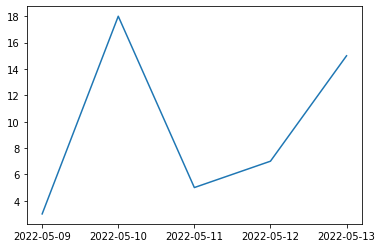

In [44]:
plt.plot(df['year'], df['total_sleep_count'])
plt.xticks(df.index)
plt.show()

In [45]:
import matplotlib.font_manager as fm
font_file_path_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_file_path_list))
#print(font_file_path_list[:5]) #복잡하고 길게 나오는 군요 

fav_font_file_path_lst = filter(lambda x: True if "BM" in x or "SDM" in x else False
                                , font_file_path_list)
print()
for font_file_path in fav_font_file_path_lst:
    print(font_file_path)

282



In [46]:
font_file_path_list

['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/kacst/KacstQurn.ttf',
 '/usr/share/fonts/truetype/liberation2/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation2/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/freefont/FreeSerifBold.ttf',
 '/usr/share/fonts/truetype/liberation2/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/tlwg/TlwgTypist-Bold.ttf',
 '/usr/share/fonts/truetype/sinhala/lklug.ttf',
 '/usr/share/fonts/truetype/liberation2/LiberationMono-Regular.ttf',
 '/usr/share/fonts/opentype/urw-base35/StandardSymbolsPS.otf',
 '/usr/share/fonts/truetype/lohit-oriya/Lohit-Odia.ttf',
 '/usr/share/fonts/truetype/tlwg/TlwgMono-BoldOblique.ttf',
 '/usr/share/fonts/opentype/urw-base35/URWGothic-BookOblique.otf',
 '/usr/share/fonts/opentype/malayalam/Manjari-Bold.otf',
 '/usr/share/fonts/opentype/urw-base35/C059-BdIta.otf',
 '/usr/share/fonts/truetype/tlwg/Umpush-Light.ttf',
 '/usr/share/fonts/truetype/libe